In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kesmarag.swpt import SWPT
from scipy import stats
from scipy.signal import impulse2
from util import calc_crest_factor
import seaborn as sns
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from scipy.signal import savgol_filter
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit
window_size, poly_order = 51, 3

Using TensorFlow backend.


In [ ]:
def func(x, a, b):
    return a*np.exp(b/x)

In [ ]:
id = '01'
ax = 3
data_1 = pd.read_csv("train/extract/{}_{}.csv".format(id, ax)).values
for j in range(len(data_1)):
    #非线性最小二乘法拟合
    popt, _ = curve_fit(lambda t,a,b: a*np.exp(b*t),  [i+1 for i in range(len(data_1[:,j]))],  data_1[:,j],  p0=(4, 0.1))
#     print(y)
    #获取popt里面是拟合系数
    a = popt[0] 
    b = popt[1]
#     y = func(data_1[:,j],a,b) #拟合y值
    y = [a*np.exp(b*t) for t in [i+1 for i in range(len(data_1[:,j]))]]
#     y = savgol_filter(data_1[:,j], window_size, poly_order)
    plt.plot([i for i in range(len(data_1[:,j]))], y)
    plt.plot([i for i in range(len(data_1[:,j]))], data_1[:,j])
    plt.title("{}".format(j))
    plt.show()

In [ ]:
id = '02'
ax = 3
data_2 = pd.read_csv("train/extract/{}_{}.csv".format(id, ax)).values
for j in range(len(data_2)):
    y = savgol_filter(data_2[:,j], window_size, poly_order)
    plt.plot([i for i in range(len(data_2[:,j]))], y)
    plt.plot([i for i in range(len(data_2[:,j]))], data_2[:,j])
    plt.title("{}".format(j))
    plt.show()

In [ ]:
id = '03'
ax = 3
data_3 = pd.read_csv("train/extract/{}_{}.csv".format(id, ax)).values
for j in range(len(data_3)):
    y = savgol_filter(data_3[:,j], window_size, poly_order)
    plt.plot([i for i in range(len(data_3[:,j]))], y)
    plt.plot([i for i in range(len(data_3[:,j]))], data_3[:,j])
    plt.title("{}".format(j))
    plt.show()

In [ ]:
id = '04'
ax = 1
t_data_3 = pd.read_csv("test/extract/{}_{}.csv".format(id, ax)).values
for j in range(len(t_data_3)):
    y = savgol_filter(t_data_3[:,j], window_size, poly_order)
    plt.plot([i for i in range(len(t_data_3[:,j]))], y)
    plt.plot([i for i in range(len(t_data_3[:,j]))], t_data_3[:,j])
    plt.title("{}".format(j))
    plt.show()

In [ ]:
# id = '01'
# ax = 1
# data_1 = pd.read_csv("train/extract/{}_{}.csv".format(id, ax)).values
# train_data = savgol_filter(data_1[:,42], window_size, poly_order)
# train_data = train_data.reshape(-1, 1)

In [ ]:
# sc = MinMaxScaler(feature_range = (0, 1))
# training_set_scaled = sc.fit_transform(train_data)

In [ ]:
# training_set_scaled = np.array([(1-s[0]) for s in training_set_scaled]).reshape(-1, 1)

In [ ]:
# plt.plot([i for i in range(len(training_set_scaled))], training_set_scaled)
# plt.show()

In [ ]:
# id = '03'
# ax = 1
# data_3 = pd.read_csv("train/extract/{}_{}.csv".format(id, ax)).values
# test_data = savgol_filter(data_3[:,42], window_size, poly_order)
# test_data = test_data.reshape(-1, 1)
# testing_set_scaled = sc.fit_transform(test_data)
# testing_set_scaled = np.array([(1-s[0]) for s in testing_set_scaled]).reshape(-1, 1)

In [ ]:
# plt.plot([i for i in range(len(testing_set_scaled))], testing_set_scaled)
# plt.show()

In [2]:
train_data = []
val_data = []
sc = MinMaxScaler(feature_range = (0, 1))

In [3]:
id = '01'
ax = [1, 2, 3]
for a in ax:
    data = pd.read_csv("train/extract/{}_{}.csv".format(id, a)).values
    tmp = [42, 43, 44, 114, 115, 116]
    for t in tmp:
#         filter_data = sc.fit_transform(savgol_filter(data[:,t], window_size, poly_order).reshape(-1, 1))
        filter_data = savgol_filter(data[:,t], window_size, poly_order).reshape(-1, 1)

#         popt, _ = curve_fit(lambda t,a,b: a*np.exp(b*t),  [i+1 for i in range(len(data[:,t]))],  data[:,t],  p0=(4, 0.1))
#         a = popt[0] 
#         b = popt[1]
#         y = [a*np.exp(b*t) for t in [i+1 for i in range(len(data[:,t]))]]
#         filter_data = sc.fit_transform(np.array(y).reshape(-1, 1))
        train_data.append(filter_data[6:-18])

id = '03'
ax = [1, 2, 3]
for a in ax:
    data = pd.read_csv("train/extract/{}_{}.csv".format(id, a)).values
    tmp = [42, 43, 44, 114, 115, 116]
    for t in tmp:
#         filter_data = sc.fit_transform(savgol_filter(data[:,t], window_size, poly_order).reshape(-1, 1))
#         popt, _ = curve_fit(lambda t,a,b: a*np.exp(b*t),  [i+1 for i in range(len(data[:,t]))],  data[:,t],  p0=(4, 0.1))
#         a = popt[0] 
#         b = popt[1]
#         y = [a*np.exp(b*t) for t in [i+1 for i in range(len(data[:,t]))]]
#         filter_data = sc.fit_transform(np.array(y).reshape(-1, 1))
        filter_data = savgol_filter(data[:,t], window_size, poly_order).reshape(-1, 1)
        val_data.append(filter_data[6:-18])

In [4]:
train_data = np.array(train_data)
val_data = np.array(val_data)
result = []

In [ ]:
print(val_data.shape)

In [5]:
tmp = train_data
for j in range(tmp.shape[0]):
    tmp[j] = sc.fit_transform(train_data[j])
train_label = [tmp[:,i].min() for i in range(tmp.shape[1])]

tmp = val_data
for j in range(tmp.shape[0]):
    tmp[j] = sc.fit_transform(val_data[j])
val_label = [tmp[:,i].min() for i in range(tmp.shape[1])]

In [ ]:
# for j in range(train_data.shape[0]):
#     X_train = []
#     y_train = []
#     for i in range(20, train_data.shape[1]):
#         X_train.append(train_data[j][i-20:i])
#         y_train.append(train_data[j][i])
#     X_train, y_train = np.array(X_train), np.array(y_train)

#     X_test = []
#     y_test = []
#     for i in range(20, val_data.shape[1]):
#         X_test.append(val_data[j][i-20:i])
#         y_test.append(val_data[j][i])
#     X_test, y_test = np.array(X_test), np.array(y_test)
    
#     plt.plot([i for i in range(len(y_train))], y_train)
#     plt.plot([i for i in range(len(y_test))], y_test)
#     plt.title("{}".format(j))
#     plt.show()
    
#     # Initialising the RNN
#     regressor = Sequential()

#     # Adding the first LSTM layer and some Dropout regularisation
#     regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#     regressor.add(Dropout(0.2))
#     # Adding a second LSTM layer and some Dropout regularisation
#     regressor.add(LSTM(units = 50, return_sequences = True))
#     regressor.add(Dropout(0.2))
#     # Adding a third LSTM layer and some Dropout regularisation
#     regressor.add(LSTM(units = 50, return_sequences = True))
#     regressor.add(Dropout(0.2))
#     # Adding a fourth LSTM layer and some Dropout regularisation
#     regressor.add(LSTM(units = 50))
#     regressor.add(Dropout(0.2))

#     # Adding the output layer
#     regressor.add(Dense(units = 1, activation='sigmoid'))

#     # Compiling the RNN
#     regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#     regressor.fit(X_train, y_train,
#               batch_size=32,
#               epochs=50,
#               validation_data=(X_test, y_test))
#     predicted = regressor.predict(X_test)
#     result.append(predicted)
#     plt.plot(y_test, color = 'red', label = 'Real')
#     plt.plot(predicted, color = 'blue', label = 'Predicted')
#     plt.xlabel('Time')
#     plt.ylabel('Value')
#     plt.legend()
#     plt.show()

In [ ]:
# pred = [result[:,i].min() for i in range(len(result[0]))]
# real = [val_data[:,i].min() for i in range(len(val_data[0]))]

In [ ]:
# train_label = sc.fit_transform(np.array([train_data[:,i].min() for i in range(len(train_data[0]))]).reshape(-1, 1))
# val_label = sc.fit_transform(np.array([val_data[:, i].min() for i in range(len(val_data[0]))]).reshape(-1, 1))

In [6]:
train_data = train_data.reshape(train_data.shape[1], train_data.shape[0])
val_data = val_data.reshape(val_data.shape[1], val_data.shape[0])
# train_label = train_label.tolist()
# val_label = val_label.tolist()

In [ ]:
# plt.plot([i for i in range(len(pred))], pred)
# plt.plot([i for i in range(len(real))], real)
# plt.show()

In [ ]:
# Creating a data structure with 20 timesteps and 1 output
# X_train = []
# y_train = []
# for i in range(20, len(training_set_scaled)):
#     X_train.append(training_set_scaled[i-20:i, 0])
#     y_train.append(training_set_scaled[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)

# X_test = []
# y_test = []
# for i in range(20, len(testing_set_scaled)):
#     X_test.append(testing_set_scaled[i-20:i, 0])
#     y_test.append(testing_set_scaled[i, 0])
# X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
# X_train, y_train = train_data, train_label
# X_test, y_test = val_data, val_label

In [ ]:
# Reshaping
# X_train = np.reshape(X_train, (X_train.shape[1], X_train.shape[0], 1))
# X_test = np.reshape(X_test, (X_test.shape[1], X_test.shape[0], 1))
# print(X_train.shape)

In [7]:
print(train_data.shape)

(263, 18)


In [8]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
svr.fit(train_data, train_label)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 10.0, 100.0, 1000.0], 'gamma': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
pre = svr.predict(val_data)
print(pre)

[ 0.19026952  0.19154979  0.19142148  0.18718165  0.18365465  0.18147278
  0.18092748  0.177558    0.1654555   0.16079205  0.13486959  0.18589779
  0.19016313  0.18957803  0.18302475  0.17905831  0.177954    0.17800674
  0.17123112  0.1661495   0.17358227  0.1466461   0.18637899  0.1906873
  0.18945537  0.18318144  0.17972429  0.17823076  0.17835705  0.1707016
  0.16680608  0.17158442  0.14901922  0.18989163  0.19252578  0.19088785
  0.18712481  0.18572656  0.18484793  0.18589784  0.17679862  0.16600973
  0.15703815  0.14787012  0.18633166  0.19195981  0.18935291  0.18313645
  0.18133782  0.18170328  0.18265629  0.17033808  0.16942366  0.16681644
  0.14823474  0.18716636  0.19222869  0.18926665  0.18381995  0.18198253
  0.18236132  0.18317392  0.17012725  0.17033819  0.16433482  0.14887969
  0.19302548  0.18913309  0.18895799  0.18550171  0.1785396   0.16955512
  0.16762665  0.16464909  0.16655158  0.14342042  0.14393241  0.1901949
  0.19004859  0.18801425  0.1840826   0.17645139  0.17

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1, activation='sigmoid'))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train,
          batch_size=32,
          epochs=50,
          validation_data=(X_test, y_test))

In [ ]:
predicted = regressor.predict(X_test)
# predicted = sc.inverse_transform(predicted)

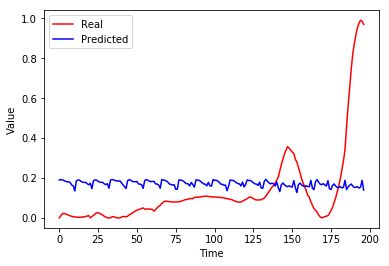

In [11]:
# Visualising the results
plt.plot(val_label, color = 'red', label = 'Real')
plt.plot(pre, color = 'blue', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()